<a href="https://colab.research.google.com/github/lin3372/400_gan/blob/main/bk-generative_deep_learning/400_gan_02_01_deep_MLP_(iL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your first deep neural network - MLP

# imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

import os

# data - cifar10

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


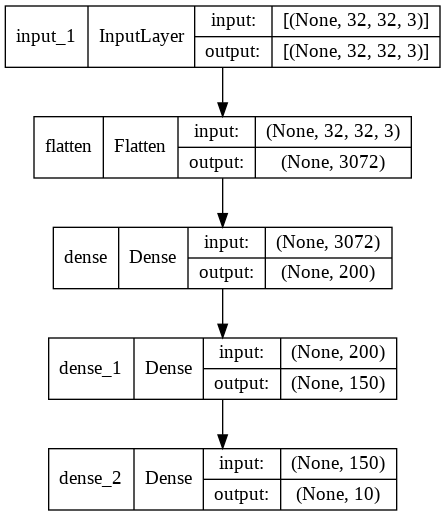

In [8]:
dot_img_file = 'model_400_gan.02.01_deep_MLP (iL).png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

# train

In [9]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8586 - accuracy: 0.3284
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6607 - accuracy: 0.4071
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5837 - accuracy: 0.4370
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5283 - accuracy: 0.4554
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4888 - accuracy: 0.4682
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4588 - accuracy: 0.4788
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4317 - accuracy: 0.4883
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4028 - accuracy: 0.4995
Epoch 9/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3848 - accuracy: 0.5065
Epoch 10/10
1563/1563 [==============================] - 10s 7ms/step -

# analysis

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4264 - accuracy: 0.4919


[1.426367163658142, 0.4918999969959259]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

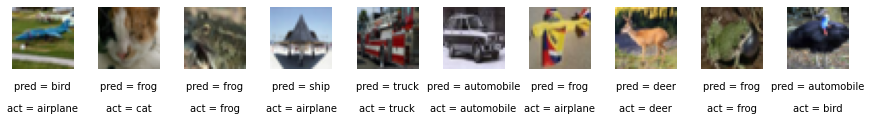

In [13]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


# Log date/time and version info

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime
import pytz

# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Taipei')
local_now = now.astimezone(tz)
print(local_now)

!python --version

print(f"tf={tf.__version__}")
print(f"numpy={np.__version__}")
print(f"pandas={pd.__version__}")



2021-12-18 09:25:02.002974+08:00
Python 3.7.12
tf=2.7.0
numpy=1.19.5
pandas=1.1.5


ivan.hp.lin
2021-12-18 09:25:02.002974+08:00
Python 3.7.12
tf=2.7.0
numpy=1.19.5
pandas=1.1.5